# Title

**Exercise: Regression with Bagging**

# Description

The aim of this exercise is to understand bagging regression. 

# Instructions:
- Read the dataset airquality.csv as a pandas dataframe.
- Take a quick look at the dataset.
- Split the data into train and test sets.
- Specify the number of bootstraps as 30 and a maximum depth of 3.
- Define a Bagging Regression model that uses Decision Tree as its base estimator.
- Fit the model on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given above.
- Predict on the test data using the first estimator and the mean model.
- Compute and display the test MSEs.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a> : Split arrays or matrices into random train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html" target="_blank">BaggingRegressor()</a> : Returns a Bagging regressor instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">DecisionTreeRegressor()</a> : A decision tree regressor.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">DecisionTreeRegressor().estimators_</a> : A list of estimators. Use this to access any of the estimators. 

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">sklearn.mean_squared_error()</a> : Mean squared error regression loss.

In [1]:
# Import necessary libraries

import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Read the dataset
df = pd.read_csv("airquality.csv",index_col=0)

In [3]:
# Take a quick look at the data
df.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
6,28.0,NaN,14.9,66,5,6
7,23.0,299.0,8.6,65,5,7
8,19.0,99.0,13.8,59,5,8
9,8.0,19.0,20.1,61,5,9
10,NaN,194.0,8.6,69,5,10


In [4]:
# We will only use Ozone for this exerice. Drop any notnas
df = df[df.Ozone.notna()]

In [5]:
# Assign "x" column as the predictor variable, only use Ozone, and "y" as the
x = df[['Ozone']].values
y = df['Temp']

In [10]:
# Split the data into train and test sets with train size as 0.8 and random_state as 102
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=102)

### Bagging Regressor

In [11]:
# Specify the number of bootstraps as 30
num_bootstraps = 30

# Specify the maximum depth of the decision tree as 3
max_depth = 3

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator 
# (estimator = DecisionTreeRegressor(max_depth=max_depth) with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
model = BaggingRegressor(
    estimator = DecisionTreeRegressor(max_depth=max_depth),
    n_estimators = num_bootstraps
)
                        
# Fit the model on the train data
model.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=30)

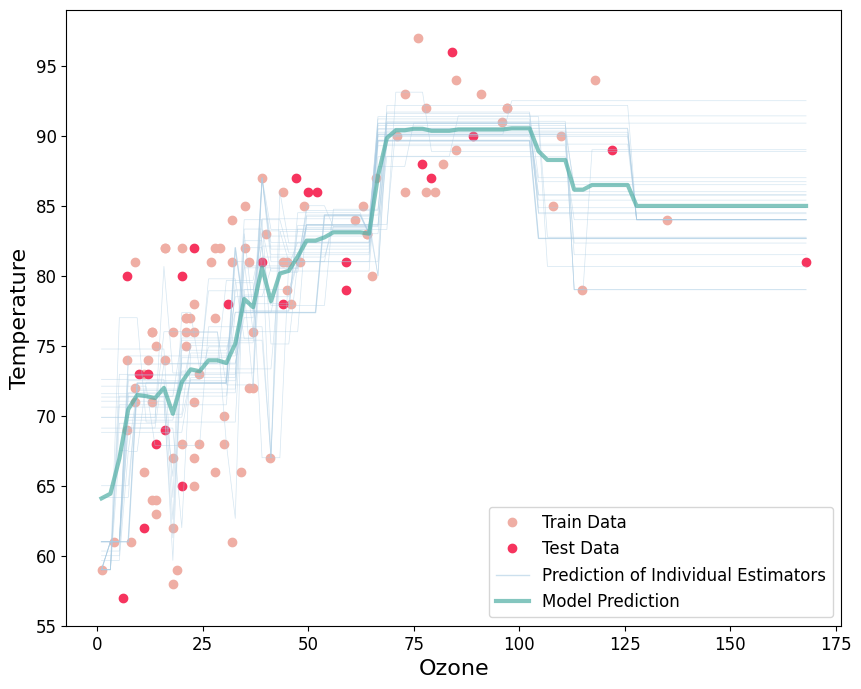

In [12]:
# Helper code to plot the predictions of individual estimators and 
plt.figure(figsize=(10,8))

xrange = np.linspace(x.min(),x.max(),80).reshape(-1,1)
plt.plot(x_train,y_train,'o',color='#EFAEA4', markersize=6, label="Train Data")
plt.plot(x_test,y_test,'o',color='#F6345E', markersize=6, label="Test Data")

plt.xlim()
for i in model.estimators_:
    y_pred1 = i.predict(xrange)
    plt.plot(xrange,y_pred1,alpha=0.5,linewidth=0.5,color = '#ABCCE3')
plt.plot(xrange,y_pred1,alpha=0.6,linewidth=1,color = '#ABCCE3',label="Prediction of Individual Estimators")


y_pred = model.predict(xrange)
plt.plot(xrange,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='Model Prediction')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()

In [14]:
# Compute the test MSE of the prediction of individual estimator
y_pred1 = model.predict(x_test)
print("The test MSE of one estimator in the model is", round(mean_squared_error(y_test,y_pred1),2))

The test MSE of one estimator in the model is 30.95


In [15]:
### edTest(test_mse) ###
# Compute the test MSE of the model prediction
#Hint: you can take any of the model estimators (model.estimators_)
y_pred = model.estimators_[0].predict(x_test)
print("The test MSE of the model is",round(mean_squared_error(y_test,y_pred),2))

The test MSE of the model is 33.76


## Mindchow 🍲

After marking, go back and change the number of bootstraps and the maximum depth of the tree. 


- Do you see any relation between them? 

- How does the variance change with change in maximum depth?

- How does the variance change with change in number of bootstraps?